In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
Datos = pd.read_csv('C:/Users/Oconer/OneDrive/Desktop/heart_cleveland_upload.csv')

In [5]:
Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [7]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

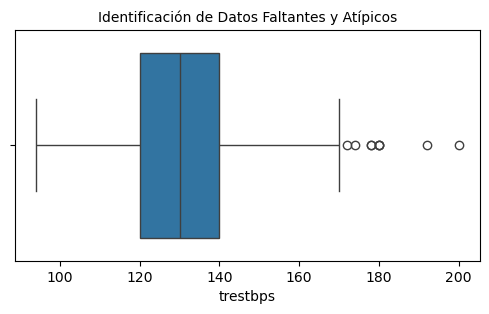

In [9]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [73]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
#se ejecute sin querer y se perdio la impformaciond elso valores faltantes

#Revisión de datos faltantes

print("Cantidad de Registros con cero en thal: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en thal:  0
Cantidad de Registros con cero en sex:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en fbs:  0


In [45]:
#Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())

In [47]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en thal: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en thal:  0
Cantidad de Registros con cero en sex:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en fbs:  0


Text(0.5, 1.0, 'Identificación de chol')

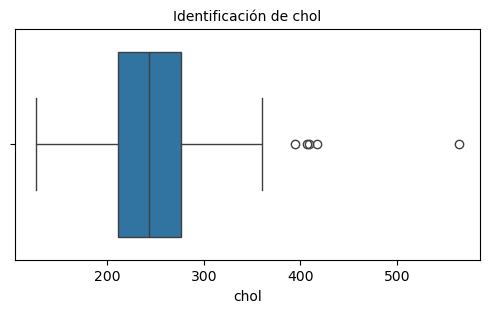

In [55]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de chol', fontsize=10 )

In [65]:
#Conteo de Datos Atípicos

nivel_minimo=150
nivel_maximo=800
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [67]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [69]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [71]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        292 non-null    int64  
 1   sex        292 non-null    float64
 2   cp         292 non-null    int64  
 3   trestbps   292 non-null    int64  
 4   chol       292 non-null    int64  
 5   fbs        292 non-null    float64
 6   restecg    292 non-null    int64  
 7   thalach    292 non-null    int64  
 8   exang      292 non-null    int64  
 9   oldpeak    292 non-null    float64
 10  slope      292 non-null    float64
 11  ca         292 non-null    float64
 12  thal       292 non-null    float64
 13  condition  292 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 34.2 KB


In [79]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
#Característica de interes:

#Tipo de dolor: si la persona tiene dolor o no (0 = no tiene - 1 = Angina atípica 2 = Dolor no anginos 3 = asintomatico)
#Predecir si una persona puede tener diabetes

In [83]:
# Total de personas con tipos de dolor

Datos['cp'].value_counts()

cp
3    140
2     80
1     49
0     23
Name: count, dtype: int64

In [85]:
Datos[['cp']].head(40)

,cp
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [87]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [155]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('cp',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['cp'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [157]:
print (X_train)

     age       sex  trestbps  chol       fbs  restecg  thalach  exang  \
64    41  0.676768       130   204  0.144781        2      172      0   
111   54  1.000000       150   232  0.144781        2      165      0   
150   39  0.676768       138   220  0.144781        0      152      0   
293   39  1.000000       118   219  0.144781        0      140      0   
18    45  1.000000       110   264  0.144781        0      132      0   
..   ...       ...       ...   ...       ...      ...      ...    ...   
46    52  1.000000       120   325  0.144781        0      172      0   
82    66  0.676768       146   278  0.144781        2      152      0   
50    49  0.676768       134   271  0.144781        0      162      0   
283   43  0.676768       132   341  1.000000        2      136      1   
239   55  1.000000       140   217  0.144781        0      111      1   

     oldpeak     slope        ca      thal  condition  
64       1.4  0.602694  0.676768  0.835017          0  
111      1.

In [159]:
print (Y_train)

64     1
111    2
150    2
293    3
18     0
      ..
46     1
82     2
50     1
283    3
239    3
Name: cp, Length: 219, dtype: int64


In [161]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [163]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [185]:
print (Y_test)

72     2
177    3
120    2
292    3
132    2
      ..
181    3
172    3
167    3
288    3
237    3
Name: cp, Length: 73, dtype: int64


In [187]:
print (Prediccion)

[2 3 2 3 1 2 1 2 2 3 3 2 3 1 2 1 3 2 3 3 1 2 2 3 3 2 3 3 1 1 3 2 2 2 2 3 3
 3 2 3 3 0 3 2 3 3 2 2 2 2 1 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 3]


In [189]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.12      0.08      0.10        12
           2       0.44      0.55      0.49        20
           3       0.64      0.71      0.68        35

    accuracy                           0.51        73
   macro avg       0.30      0.34      0.32        73
weighted avg       0.45      0.51      0.47        73



In [191]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

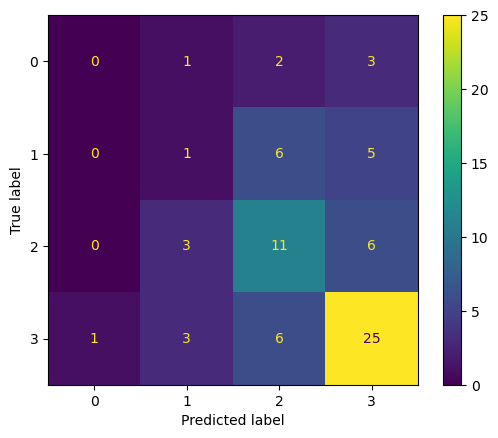

In [193]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()